In [4]:
#import requests
#import time
#import timeit
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_json("etsy.json")

In [6]:
df.head()

,cur,description,favorites,overview,price,title
0,CAD,I acquired a lot of vintage 1940s WW2 correspo...,291,"[\n Vintage item from the 1940s\n, \n Ma...",9.85,1 Vintage WW2 correspondence letter from famil...
1,USD,1982 unused vintage 20 cent Floral Love postag...,315,"[\n Vintage item from the 1980s\n, \n Ma...",25.00,Pack of 25 Unused Floral Love Stamps - 20c - V...
2,USD,Several Royal Caribbean cruise ships use card ...,90,"[\n Handmade item\n, \n Made to order\n,...",1.25,Royal Caribbean Anchor Cruise Light Card® card...
3,USD,"handmade wooden music box Game of Thrones, Gam...",376,"[\n Handmade item\n, \n Materials: Birch...",31.00,"handmade wooden music box Game of Thrones, thr..."
4,USD,Welcome to My New Collection! Please note thi...,776,"[\n Vintage handmade item\n, \n Instant ...",1.00,"Vintage Travel Posters (164 images)- Vintage,..."


In [7]:
len(df)

13592

In [8]:
usdf=df[df['cur']=='USD']
len(usdf)

10608

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
usdf['description'].values

array(['1982 unused vintage 20 cent Floral Love postage stamps. You will receive 25 total stamps all in mint condition. Perfect for wedding envelopes, postcards, birthday invitations, scrapbooking or other crafts!  Quantity: 25 Face Value: 20 cents each Year of Issue: 1982  If you need less than 25 stamps,',
       'Several Royal Caribbean cruise ships use card key switches to conserve energy in guest cabins.  The RCCL suggestion is to use one of your room keys - which often results in a forgotten key when leaving the room.  So I have created the Light Card® card key switch activator!  It consists of a PVC card',
       'handmade wooden music box Game of Thrones, Game of Thrones Stark, thrones music box, Christmas gifts, throne of swords, Thrones music box men gift  Our music box is a wonderful Christmas gift to your family, friends and fans of the Games of the Throne.  We made special holes in the music box so that',
       ...,
       'Vintage chicken creamer from the 1950s.  It look

In [11]:
usdf['description'].str.replace(r"[^a-zA-Z\d\s]", '').values

array(['1982 unused vintage 20 cent Floral Love postage stamps You will receive 25 total stamps all in mint condition Perfect for wedding envelopes postcards birthday invitations scrapbooking or other crafts  Quantity 25 Face Value 20 cents each Year of Issue 1982  If you need less than 25 stamps',
       'Several Royal Caribbean cruise ships use card key switches to conserve energy in guest cabins  The RCCL suggestion is to use one of your room keys  which often results in a forgotten key when leaving the room  So I have created the Light Card card key switch activator  It consists of a PVC card',
       'handmade wooden music box Game of Thrones Game of Thrones Stark thrones music box Christmas gifts throne of swords Thrones music box men gift  Our music box is a wonderful Christmas gift to your family friends and fans of the Games of the Throne  We made special holes in the music box so that',
       ...,
       'Vintage chicken creamer from the 1950s  It looks like someone tried to

In [12]:
linkregex = r"((([A-Za-z]{3,9}:(?:\/\/)?)(?:[-;:&=\+\$,\w]+@)?[A-Za-z0-9.-]+|(?:www.|[-;:&=\+\$,\w]+@)[A-Za-z0-9.-]+)((?:\/[\+~%\/.\w\-_]*)?\??(?:[-\+=&;%@.\w_]*)#?(?:[\w]*))?)"
usdf['description'].str.replace(linkregex, '')

1        1982 unused vintage 20 cent Floral Love postag...
2        Several Royal Caribbean cruise ships use card ...
3        handmade wooden music box Game of Thrones, Gam...
4        Welcome to My New Collection!  Please note thi...
5        ❤ Available sizes : 100 tag 2x1 inch 48 cards ...
6        vintage Northwestern small gumball machine res...
7        DEAR CLIENTS, IN THIS TIME WE HAVE TOO MUCH WO...
8        This multi-necklace display is perfect for sto...
9        Dear customer!  You can add YOUR ENGRAVING on ...
10       I recently refinished one of these for an insp...
11       ♤♡♢♧ Unique poker card protector or may be use...
12       Create the most awesome custom awards on the p...
13       HELLO!  ✨ sing for you chain badges ✨ : Linked...
14       Dimensions: 8 tall, thickness options ( 1/4 an...
15       This Handcrafted Honduras Dugout has a slider ...
16       Vintage paper target of a Jack Rabbit made and...
17       Meet Rocky, the pet that doesn’t poop! Inside .

In [13]:
linkregex = r"((([A-Za-z]{3,9}:(?:\/\/)?)(?:[-;:&=\+\$,\w]+@)?[A-Za-z0-9.-]+|(?:www.|[-;:&=\+\$,\w]+@)[A-Za-z0-9.-]+)((?:\/[\+~%\/.\w\-_]*)?\??(?:[-\+=&;%@.\w_]*)#?(?:[\w]*))?)"
usdf['description'] = usdf['description'].str.replace(linkregex, '')
usdf['description'] = usdf['description'].str.replace(r"[^a-zA-Z\d\s]", '')
usdf['description'].str.lower()

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1        1982 unused vintage 20 cent floral love postag...
2        several royal caribbean cruise ships use card ...
3        handmade wooden music box game of thrones game...
4        welcome to my new collection  please note this...
5         available sizes  100 tag 2x1 inch 48 cards 2x...
6        vintage northwestern small gumball machine res...
7        dear clients in this time we have too much wor...
8        this multinecklace display is perfect for stor...
9        dear customer  you can add your engraving on o...
10       i recently refinished one of these for an insp...
11        unique poker card protector or may be used as...
12       create the most awesome custom awards on the p...
13       hello   sing for you chain badges   linked cha...
14       dimensions 8 tall thickness options  14 and 12...
15       this handcrafted honduras dugout has a slider ...
16       vintage paper target of a jack rabbit made and...
17       meet rocky the pet that doesnt poop inside thi.

In [14]:
usdf['description'] = usdf['description'].str.lower()

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
usdf['description'].values

array(['1982 unused vintage 20 cent floral love postage stamps you will receive 25 total stamps all in mint condition perfect for wedding envelopes postcards birthday invitations scrapbooking or other crafts  quantity 25 face value 20 cents each year of issue 1982  if you need less than 25 stamps',
       'several royal caribbean cruise ships use card key switches to conserve energy in guest cabins  the rccl suggestion is to use one of your room keys  which often results in a forgotten key when leaving the room  so i have created the light card card key switch activator  it consists of a pvc card',
       'handmade wooden music box game of thrones game of thrones stark thrones music box christmas gifts throne of swords thrones music box men gift  our music box is a wonderful christmas gift to your family friends and fans of the games of the throne  we made special holes in the music box so that',
       ...,
       'vintage chicken creamer from the 1950s  it looks like someone tried to

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/eli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
from nltk.corpus import stopwords
s=set(stopwords.words('english'))

txt="a long string of text about him and her"
[x for x in txt.split() if not x in s]

['long', 'string', 'text']

In [19]:
usdf['desc'] = usdf['description'].apply(lambda desc: ' '.join([x for x in desc.split() if not x in s]))

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
usdf.head()

,cur,description,favorites,overview,price,title,desc
1,USD,1982 unused vintage 20 cent floral love postag...,315,"[\n Vintage item from the 1980s\n, \n Ma...",25.00,Pack of 25 Unused Floral Love Stamps - 20c - V...,1982 unused vintage 20 cent floral love postag...
2,USD,several royal caribbean cruise ships use card ...,90,"[\n Handmade item\n, \n Made to order\n,...",1.25,Royal Caribbean Anchor Cruise Light Card® card...,several royal caribbean cruise ships use card ...
3,USD,handmade wooden music box game of thrones game...,376,"[\n Handmade item\n, \n Materials: Birch...",31.00,"handmade wooden music box Game of Thrones, thr...",handmade wooden music box game thrones game th...
4,USD,welcome to my new collection please note this...,776,"[\n Vintage handmade item\n, \n Instant ...",1.00,"Vintage Travel Posters (164 images)- Vintage,...",welcome new collection please note digital sto...
5,USD,available sizes 100 tag 2x1 inch 48 cards 2x...,374,"[\n Handmade item\n, \n Craft type: Jewe...",15.00,Custom Earring Card - Jewelry Display - Vin...,available sizes 100 tag 2x1 inch 48 cards 2x2 ...


In [36]:
word='the'
word.isnumeric()

False

In [29]:

from nltk.probability import FreqDist


CPU times: user 360 ms, sys: 0 ns, total: 360 ms
Wall time: 357 ms


In [37]:
%%time
fdist = FreqDist(word for word in ' '.join(usdf['desc'].values).split() if not word.isnumeric())

CPU times: user 424 ms, sys: 4 ms, total: 428 ms
Wall time: 430 ms


In [43]:
%%timeit
fdist = FreqDist(word for word in ' '.join(usdf['desc'].values).split() if not word.isnumeric())

356 ms ± 2.34 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [38]:
fdist.pprint(maxlen=20)

FreqDist({'vintage': 4053, 'condition': 2409, 'made': 2390, 'x': 1949, 'inches': 1643, 'stamps': 1585, 'great': 1563, 'one': 1451, 'glass': 1323, 'measures': 1264, 'please': 1185, 'original': 1168, 'antique': 1059, 'box': 1014, 'good': 1003, 'hand': 983, 'piece': 969, 'gift': 968, 'size': 959, 'tall': 958, ...})


In [88]:
import re
usdf['adesc'] = usdf['desc'].apply(lambda desc: ' '.join([x for x in desc.split() if not bool(re.search(r'\d', x))]))

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [89]:
usdf.head()

,cur,description,favorites,overview,price,title,desc,adesc
1,USD,1982 unused vintage 20 cent floral love postag...,315,"[\n Vintage item from the 1980s\n, \n Ma...",25.00,Pack of 25 Unused Floral Love Stamps - 20c - V...,1982 unused vintage 20 cent floral love postag...,unused vintage cent floral love postage stamps...
2,USD,several royal caribbean cruise ships use card ...,90,"[\n Handmade item\n, \n Made to order\n,...",1.25,Royal Caribbean Anchor Cruise Light Card® card...,several royal caribbean cruise ships use card ...,several royal caribbean cruise ships use card ...
3,USD,handmade wooden music box game of thrones game...,376,"[\n Handmade item\n, \n Materials: Birch...",31.00,"handmade wooden music box Game of Thrones, thr...",handmade wooden music box game thrones game th...,handmade wooden music box game thrones game th...
4,USD,welcome to my new collection please note this...,776,"[\n Vintage handmade item\n, \n Instant ...",1.00,"Vintage Travel Posters (164 images)- Vintage,...",welcome new collection please note digital sto...,welcome new collection please note digital sto...
5,USD,available sizes 100 tag 2x1 inch 48 cards 2x...,374,"[\n Handmade item\n, \n Craft type: Jewe...",15.00,Custom Earring Card - Jewelry Display - Vin...,available sizes 100 tag 2x1 inch 48 cards 2x2 ...,available sizes tag inch cards inch cards inch...


In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
descs = usdf['adesc'].values

In [91]:
tfidf =  TfidfVectorizer().fit_transform(descs)

In [92]:
tfidf.shape

(10608, 21154)

In [93]:
from sklearn.decomposition import TruncatedSVD

X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(tfidf)

In [94]:
from sklearn.manifold import TSNE

In [95]:
%%time
X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10608 samples in 0.022s...
[t-SNE] Computed neighbors for 10608 samples in 15.690s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10608
[t-SNE] Computed conditional probabilities for sample 2000 / 10608
[t-SNE] Computed conditional probabilities for sample 3000 / 10608
[t-SNE] Computed conditional probabilities for sample 4000 / 10608
[t-SNE] Computed conditional probabilities for sample 5000 / 10608
[t-SNE] Computed conditional probabilities for sample 6000 / 10608
[t-SNE] Computed conditional probabilities for sample 7000 / 10608
[t-SNE] Computed conditional probabilities for sample 8000 / 10608
[t-SNE] Computed conditional probabilities for sample 9000 / 10608
[t-SNE] Computed conditional probabilities for sample 10000 / 10608
[t-SNE] Computed conditional probabilities for sample 10608 / 10608
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 1.215s
[t-SNE] Iteration 50: error = 90.6

In [53]:
usdf['price'] = pd.to_numeric(usdf['price'].apply(lambda x: x.replace(',','')))

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
len(usdf[usdf.price<100])

9600

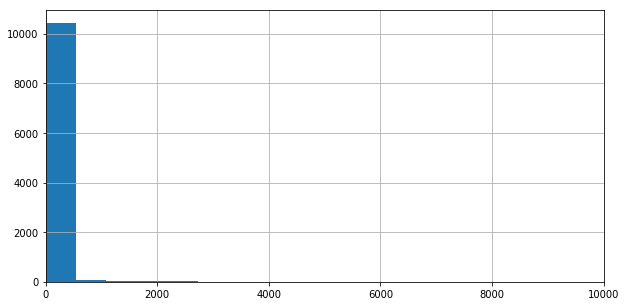

In [61]:
fig, ax =plt.subplots(figsize=(10,5))
ax.set_xlim(0,10000)
usdf.price.hist(ax=ax, bins=50)

In [98]:
[i for i in range(1,10)]

[1, 2, 3, 4, 5, 6, 7, 8, 9]

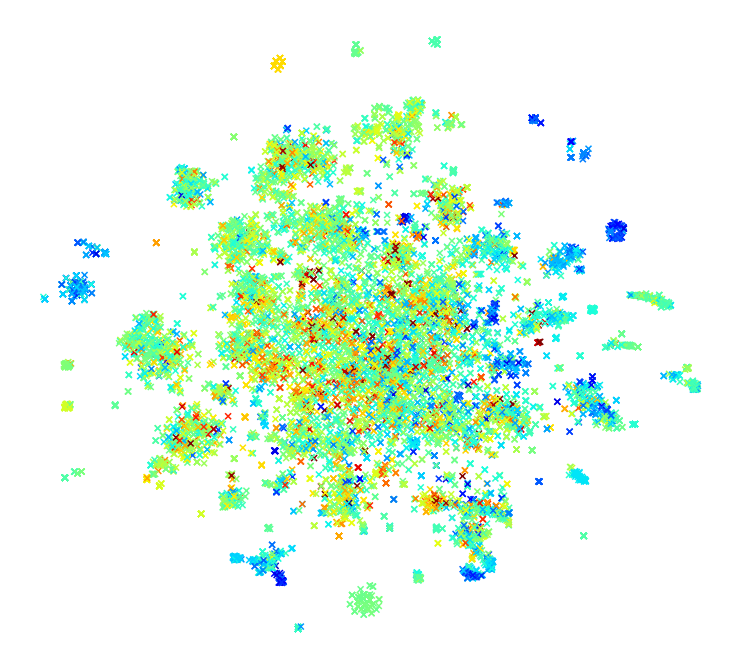

In [96]:
from matplotlib import cm
from matplotlib import colors
#norm = cm.colors.Normalize(vmax=1000, vmin=usdf.price.values.min())
cmap = cm.jet

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(frameon=False)
plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1],
        c=usdf.price.values, marker="x", cmap=cmap, norm=colors.LogNorm(vmax=1000, vmin=usdf.price.values.min()))

In [ ]:
from scipy.cluster import  hierarchy


In [67]:
#Clustering
X = tfidf.todense()
threshold = 0.1
Z = hierarchy.linkage(X,"average", metric="cosine")
C = hierarchy.fcluster(Z, threshold, criterion="distance")

### ...........
### after 20 mins

In [68]:
len(C)

10608

In [69]:
len(np.unique(C))

8477

In [70]:
usdf['clusters'] = C
usdf.head()

,cur,description,favorites,overview,price,title,desc,clusters
1,USD,1982 unused vintage 20 cent floral love postag...,315,"[\n Vintage item from the 1980s\n, \n Ma...",25.00,Pack of 25 Unused Floral Love Stamps - 20c - V...,1982 unused vintage 20 cent floral love postag...,3247
2,USD,several royal caribbean cruise ships use card ...,90,"[\n Handmade item\n, \n Made to order\n,...",1.25,Royal Caribbean Anchor Cruise Light Card® card...,several royal caribbean cruise ships use card ...,8044
3,USD,handmade wooden music box game of thrones game...,376,"[\n Handmade item\n, \n Materials: Birch...",31.00,"handmade wooden music box Game of Thrones, thr...",handmade wooden music box game thrones game th...,7138
4,USD,welcome to my new collection please note this...,776,"[\n Vintage handmade item\n, \n Instant ...",1.00,"Vintage Travel Posters (164 images)- Vintage,...",welcome new collection please note digital sto...,6247
5,USD,available sizes 100 tag 2x1 inch 48 cards 2x...,374,"[\n Handmade item\n, \n Craft type: Jewe...",15.00,Custom Earring Card - Jewelry Display - Vin...,available sizes 100 tag 2x1 inch 48 cards 2x2 ...,8122


In [116]:
usdf = usdf.sort_values(by='clusters')


In [118]:
usdf.reset_index(drop=True, inplace=True)

In [128]:
closeby = np.zeros(len(usdf))
eps = 1.0
for index, row in usdf.iterrows():
    if(index<len(usdf)-2):
        i2 = index+1
        row2=usdf.iloc[i2]
        while(row['clusters']==row2['clusters']):
            #print(row[['price','title']], row2[['price','title']])
            if (np.abs(float(row['price'])-float(row2['price']))<eps):
                closeby[i2]=1
            if(i2<len(usdf)-1): 
                i2+=1
                row2=usdf.iloc[i2]
        

In [129]:
np.sum(closeby)

1927.0

In [96]:
len(C)

10608

In [97]:
len(np.unique(C))

8477

In [98]:
len(C)-len(np.unique(C))

2131

In [113]:
usdf.reset_index(drop=True)

,cur,description,favorites,overview,price,title,desc,clusters
0,USD,1982 unused vintage 20 cent floral love postag...,315,"[\n Vintage item from the 1980s\n, \n Ma...",25.00,Pack of 25 Unused Floral Love Stamps - 20c - V...,1982 unused vintage 20 cent floral love postag...,3247
1,USD,several royal caribbean cruise ships use card ...,90,"[\n Handmade item\n, \n Made to order\n,...",1.25,Royal Caribbean Anchor Cruise Light Card® card...,several royal caribbean cruise ships use card ...,8044
2,USD,handmade wooden music box game of thrones game...,376,"[\n Handmade item\n, \n Materials: Birch...",31.00,"handmade wooden music box Game of Thrones, thr...",handmade wooden music box game thrones game th...,7138
3,USD,welcome to my new collection please note this...,776,"[\n Vintage handmade item\n, \n Instant ...",1.00,"Vintage Travel Posters (164 images)- Vintage,...",welcome new collection please note digital sto...,6247
4,USD,available sizes 100 tag 2x1 inch 48 cards 2x...,374,"[\n Handmade item\n, \n Craft type: Jewe...",15.00,Custom Earring Card - Jewelry Display - Vin...,available sizes 100 tag 2x1 inch 48 cards 2x2 ...,8122
5,USD,vintage northwestern small gumball machine res...,8,"[\n Handmade item\n, \n Materials: metal...",249.00,Philadelphia Eagles NFL inspired vintage gumba...,vintage northwestern small gumball machine res...,2827
6,USD,dear clients in this time we have too much wor...,2744,"[\n Handmade item\n, \n Material: canvas...",43.00,Custom Dog portrait Custom Dog Painting Custom...,dear clients time much work new orders listing...,5798
7,USD,this multinecklace display is perfect for stor...,1824,"[\n Handmade item\n, \n Craft type: Jewe...",25.00,Necklace Display w/ Custom Logo- 9 Necklaces {...,multinecklace display perfect stores craft sho...,7772
8,USD,dear customer you can add your engraving on o...,422,"[\n Handmade item\n, \n Materials: Wood,...",22.50,Long Stem Elegant Smoking Pipe Lord of the Rin...,dear customer add engraving pipes make perfect...,7328
9,USD,i recently refinished one of these for an insp...,2299,"[\n Handmade item\n, \n Materials: ename...",175.00,Legend of Zelda Master Sword Full-Size Metal R...,recently refinished one inspiration mine youtu...,1805


In [142]:
usdf.groupby('clusters')['price'].std()

clusters
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       0.0
7       0.0
8       NaN
9       NaN
10      0.0
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
30      NaN
       ... 
8448    NaN
8449    NaN
8450    NaN
8451    NaN
8452    NaN
8453    NaN
8454    NaN
8455    NaN
8456    NaN
8457    0.0
8458    NaN
8459    NaN
8460    0.0
8461    0.0
8462    NaN
8463    NaN
8464    NaN
8465    NaN
8466    NaN
8467    NaN
8468    NaN
8469    NaN
8470    NaN
8471    NaN
8472    NaN
8473    NaN
8474    NaN
8475    NaN
8476    NaN
8477    NaN
Name: price, Length: 8477, dtype: float64

### Lets have 20 clusters

In [143]:
#Clustering
maxclust = 20
C20 = hierarchy.fcluster(Z, maxclust, criterion="maxclust")

In [146]:
np.unique(C20)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int32)

In [147]:
usdf['c20'] = C20
usdf.head()

,cur,description,favorites,overview,price,title,desc,clusters,c20
0,USD,sza ctrl,163,"[\n Handmade item\n, \n Made to order\n,...",6.0,SZA Ctrl,sza ctrl,1,18
1,USD,sza squatting by the coast,74,"[\n Handmade item\n, \n Favorited by: , ...",6.0,SZA,sza squatting coast,2,18
2,USD,seven days in may the classic 1964 john franke...,8,"[\n Vintage item from the 1960s\n, \n Fa...",40.0,SEVEN DAYS in MAY 1965 original Japanese movie...,seven days may classic 1964 john frankenheimer...,3,18
3,USD,to catch a king 1983 original 27 x 41 u s movi...,2,"[\n Vintage item from the 1980s\n, \n Ma...",16.0,"To Catch a King.Original 1983 US 27""x41"" Rare ...",catch king 1983 original 27 x 41 u movie poste...,4,18
4,USD,truman capotes in cold blood the 1967 richard ...,15,"[\n Vintage item from the 1960s\n, \n Fa...",50.0,IN COLD BLOOD 1967 original french movie poste...,truman capotes cold blood 1967 richard brooks ...,5,18


In [151]:
usdf['overview'].apply(lambda x: print(x))

['\n    Handmade item\n', '\n    Made to order\n', '\n    Favorited by: ', '\n', '\n        Gift wrapping and message available\n        ', '\n    ']
['\n    Handmade item\n', '\n    Favorited by: ', '\n', '\n        Gift wrapping and message available\n        ', '\n    ']
['\n    Vintage item from the 1960s\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Vintage item from the 1980s\n', '\n    Materials: paper, ink\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Vintage item from the 1960s\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Handmade item\n', '\n    Materials: wood, high carbon steel, patina, highly persistent wax, beechwood\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Handmade item\n', '\n    Materials: wood, high carbon steel, patina, highly persistent wax, beechwood\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Handmade item\n'

['\n    Handmade item\n', '\n    Material: Enamel\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Vintage item from the 1700s\n', '\n    Favorited by: ', '\n']
['\n    Vintage item from 1900 - 1909\n', '\n    Materials: brass, enamel\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Handmade item\n', '\n    Materials: china, metal hinge\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Handmade item\n', '\n    Materials: china, metal hinge\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Vintage item\n', '\n    Materials: enamel, silver metal\n', '\n    Favorited by: ', '\n', '\n        Gift wrapping and message available\n        ', '\n    ']
['\n    Handmade item\n', '\n    Favorited by: ', '\n']
['\n    Handmade item\n', '\n    Materials: silver, gilding, enamel\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Handmade item\n', '\n    Material: Enamel

['\n    Vintage item from the 1960s\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Vintage item from the 1950s\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Vintage item from the 1980s\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Vintage item from the 1930s\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Vintage item from the 1960s\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Vintage item from the 1980s\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Vintage item from the 1980s\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Vintage item from the 1980s\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Vintage item from the 1930s\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Vintage item from the 1930s\n', '\n    Favorited by: ', 

['\n    Vintage item from the 1960s\n', '\n    Material: glass\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Vintage item from the 1990s\n', '\n    Materials: LE Smith Glass, Hobnail Glass, White Milk Glass\n', '\n    Favorited by: ', '\n', '\n        Gift wrapping and message available\n        ', '\n    ']
['\n    Vintage item from the 1970s\n', '\n    Materials: Amber Glass, Factory Box\n', '\n    Favorited by: ', '\n', '\n        Gift wrapping and message available\n        ', '\n    ']
['\n    Vintage item from the 1970s\n', '\n    Material: glass\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Vintage item from the 1970s\n', '\n    Material: Iridescent Glass\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Vintage item from the 1970s\n', '\n    Materials: glass, amber glass, metal\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Vintage item from the 1930s\n', '\n    Ma

['\n    Vintage item from the 1930s\n', '\n    Materials: WOOD, WOODEN, CARVED WOOD, OLD WOOD, OLD CARVED WOOD, BRISTLES\n', '\n    Favorited by: ', '\n', '\n        Gift wrapping and message available\n        ', '\n    ']
['\n    Vintage item from the 1910s\n', '\n    Materials: CAST IRON, OLD CAST IRON, VINTAGE CAST IRON, RUSTY CAST IRON, CAST IRON WITH PATINA, ANTIQUE CAST IRON\n', '\n    Favorited by: ', '\n', '\n        Gift wrapping and message available\n        ', '\n    ']
['\n    Vintage item from the 1970s\n', '\n    Materials: STAINLESS STEEL, METAL, TARNISHED METAL, SILVER TONE METAL\n', '\n    Favorited by: ', '\n', '\n        Gift wrapping and message available\n        ', '\n    ']
['\n    Vintage item from the 1950s\n', '\n    Materials: china, hand painted china, VINTAGE CHINA, OLD CHINA, ANTIQUE CHINA\n', '\n    Favorited by: ', '\n', '\n        Gift wrapping and message available\n        ', '\n    ']
['\n    Vintage item from the 1940s\n', '\n    Materials: Fine C

['\n    Handmade item\n', '\n    Material: leather\n', '\n    Made to order\n', '\n    Favorited by: ', '\n', '\n        Gift wrapping and message available\n        ', '\n    ']
['\n    Handmade item\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Handmade item\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Handmade item\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Vintage item\n', '\n    Materials: Cardboard, Wax, Plastic\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Vintage item from the 1950s\n', '\n    Material: wax\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Vintage item\n', '\n    Material: wood\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Vintage item\n', '\n    Processing time: 1 Day\n', '\n    Favorited by: ', '\n', '\n        Gift wrapping and message available\n        ', '\n    ']
['\n    Handma

0        None
1        None
2        None
3        None
4        None
5        None
6        None
7        None
8        None
9        None
10       None
11       None
12       None
13       None
14       None
15       None
16       None
17       None
18       None
19       None
20       None
21       None
22       None
23       None
24       None
25       None
26       None
27       None
28       None
29       None
         ... 
10578    None
10579    None
10580    None
10581    None
10582    None
10583    None
10584    None
10585    None
10586    None
10587    None
10588    None
10589    None
10590    None
10591    None
10592    None
10593    None
10594    None
10595    None
10596    None
10597    None
10598    None
10599    None
10600    None
10601    None
10602    None
10603    None
10604    None
10605    None
10606    None
10607    None
Name: overview, Length: 10608, dtype: object

In [154]:
'vintage' in ' '.join(['\n    Vintage item\n', '\n    Favorited by: ', '\n', '\n        Gift wrapping and message available\n        ', '\n    ']).lower()

True

In [163]:
import re
re.findall(r'\d{4}',' '.join(['\n    Vintage item \n', '\n    Favorited by: ', '\n', '\n        Gift wrapping and message available\n        ', '\n    ']))

[]

In [166]:
usdf['vintage'] = usdf['overview'].apply(lambda x: int('vintage' in ' '.join(x).lower()))

In [169]:
usdf['year'] = usdf['overview'].apply(lambda x: re.findall(r'\d{4}',' '.join(x).lower())[0] if(len(re.findall(r'\d{4}',' '.join(x).lower()))>0) else np.nan)

In [173]:
usdf['handmade'] = usdf['overview'].apply(lambda x: int('handmade' in ' '.join(x).lower() or 'hand-made' in ' '.join(x).lower()))

In [191]:
def extract_materials(ov):
    l = [re.sub(r"[^a-zA-Z\d\s]", '', x).lower().replace('materials','').replace('material','').strip() for x in ov if 'materials' in x.lower() or 'material' in x.lower()] 
    return l[0] if len(l)>0 else np.nan
    
usdf['materials'] = usdf['overview'].apply(extract_materials)

In [192]:
usdf.columns

Index(['cur', 'description', 'favorites', 'overview', 'price', 'title', 'desc',
       'clusters', 'c20', 'vintage', 'year', 'handmade', 'materials'],
      dtype='object')

In [1]:
usdf.head()

NameError: name 'usdf' is not defined